# Case study on Supervised learning
Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment.

In [4]:
iris_data=pd.read_excel(r'C:\\Users\\We care\\iris (2).xls')

In [5]:
iris_data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris_data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2. Do necessary pre-processing steps.

In [8]:
iris_data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
iris_data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [10]:
for i in ['SL','SW','PL']:
    iris_data[i]=iris_data[i].fillna(iris_data[i].median())
    

In [11]:
iris_data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Text(0.5, 1.0, 'box plot of iris data')

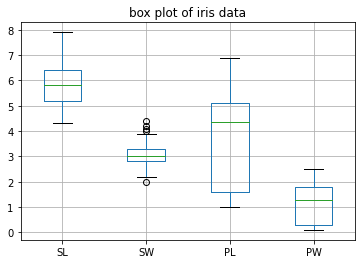

In [12]:
iris_data.boxplot(column=['SL','SW','PL','PW'])
plt.title('box plot of iris data')


Text(0.5, 1.0, 'box plot of SW')

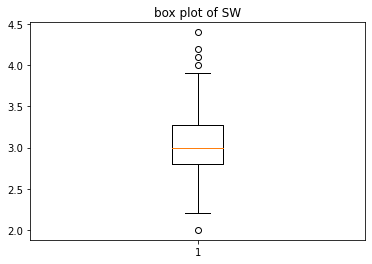

In [13]:
plt.boxplot(iris_data['SW'])
plt.title('box plot of SW')

In [14]:
Q1= np.percentile(iris_data['SW'], 25, interpolation='midpoint')
Q2= np.percentile(iris_data['SW'], 50, interpolation='midpoint')
Q3= np.percentile(iris_data['SW'], 75, interpolation='midpoint')
IQR=Q3-Q1
Low_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR


In [15]:
outlier=[]
for x in iris_data['SW']:
    if((x>Up_lim) or (x<Low_lim)):
        outlier.append(x)

In [283]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [18]:
ind1=iris_data['SW']>Up_lim
iris_data.loc[ind1].index
iris_data.drop(iris_data.loc[ind1].index,inplace=True)

Text(0.5, 1.0, 'box plot of SW')

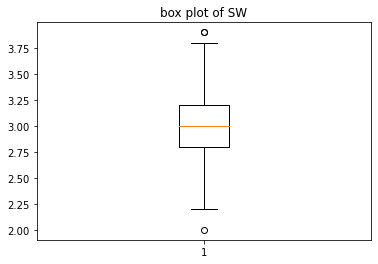

In [19]:
plt.boxplot(iris_data['SW'])
plt.title('box plot of SW')

# 3. Find out which classification model gives the best result to predict iris species.


In [217]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import svm



<AxesSubplot:>

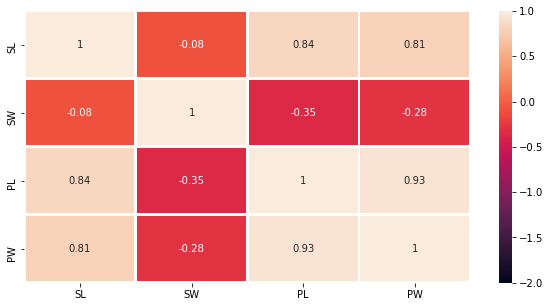

In [288]:
corrmatrix=iris_data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix,vmin=-2,vmax=1,linewidth=2,annot=True)

In [289]:
x=iris_data.drop(['Classification'],axis=1)
y=iris_data['Classification']

In [290]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.25)


In [296]:
x_train.shape

(109, 4)

# Logistic Regression

In [297]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

'from sklearn.linear_model import LogisticRegression\nmodel=LogisticRegression()\nmodel.fit(x_train, y_train)\ny_pred=model.predict(x_test)'

In [286]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [287]:
print('accuracy is',accuracy_score(y_test,y_pred))

accuracy is 0.918918918918919


# KNN 

In [257]:
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=3)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [258]:
acc_values

[0.8918918918918919,
 0.8918918918918919,
 0.8918918918918919,
 0.8918918918918919,
 0.8918918918918919,
 0.8918918918918919,
 0.8918918918918919,
 0.8918918918918919,
 0.8918918918918919,
 0.8918918918918919,
 0.8918918918918919,
 0.8918918918918919]

In [259]:
print('accuracy is',accuracy_score(y_test,y_pred))

accuracy is 0.8918918918918919


Text(0, 0.5, 'accuracy')

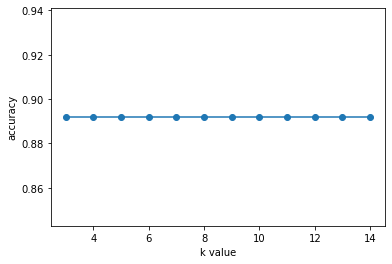

In [260]:
plt.plot(neighbors,acc_values,'-o')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [267]:
confusion_matrix(y_test,y_pred)

array([[11,  2,  0],
       [ 0,  9,  0],
       [ 0,  2, 13]], dtype=int64)

# Standard Scaling

In [268]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_train=Scaler.fit_transform(x_train)
x_test=Scaler.fit_transform(x_test)

In [269]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [270]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score 

In [271]:
print('accuracy is',accuracy_score(y_test,y_pred))

accuracy is 0.918918918918919


In [272]:
f1_score(y_test,y_pred,average='micro')

0.918918918918919

In [273]:
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 13]], dtype=int64)

# SVM Model

In [274]:
from sklearn.svm import SVC
from sklearn import metrics
model=SVC(gamma='scale')
model.fit(x_train,y_train)
prediction=model.predict(x_test)

In [275]:
print('accuracy is',metrics.accuracy_score(y_test,y_pred))

accuracy is 0.918918918918919


In [276]:
f1_score(y_test,y_pred,average='micro')

0.918918918918919

In [277]:
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 13]], dtype=int64)

# Decision tree

In [278]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('accuracy is',metrics.accuracy_score(y_test,y_pred))

accuracy is 0.918918918918919


# RandomForestClassifier

In [279]:
from sklearn.ensemble import RandomForestClassifier
ranfor=RandomForestClassifier()
ranfor.fit(x_train,y_train)
prediction=ranfor.predict(x_test)

In [280]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [281]:
print('PRECISION SCORE IS',precision_score(y_test,y_pred,average='micro'))
print('RECALL SCORE IS',recall_score(y_test,y_pred,average='micro'))
print('f1 SCORE IS',f1_score(y_test,y_pred,average='micro'))

PRECISION SCORE IS 0.918918918918919
RECALL SCORE IS 0.918918918918919
f1 SCORE IS 0.918918918918919


In [282]:
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 13]], dtype=int64)

# note

# SVM, Decision tree and Logistic Regression gave the best result for prediction with high accuracy 91.8 per. Inaddition Random Forest Classifier provides 91.89 accuracy.